<a href="https://colab.research.google.com/github/LEFT-BEE/DACON_predict_compete/blob/main/database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import zipfile as zip

In [ ]:
zip_r = zip.ZipFile("/content/drive/MyDrive/My project/dataset/open (1).zip")
zip_r.extractall('/content/drive/MyDrive/My project/dataset')
zip_r.close()
#extractall() 메서드를 이용하면 zip파일의 모든 파일ㅇ과 폴더를 현재 작업 디렉터리로 압축해제 가능하다 

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/My project/dataset/open/train.csv")
test = pd.read_csv("/content/drive/MyDrive/My project/dataset/open/test.csv")
sample_submission = pd.read_csv("/content/drive/MyDrive/My project/dataset/open/sample_submission.csv")

train.shape

(26457, 20)

In [ ]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [ ]:
data = pd.concat([train ,test] , axis = 0)
data.isnull().sum()

index                0
gender               0
car                  0
reality              0
child_num            0
income_total         0
income_type          0
edu_type             0
family_type          0
house_type           0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
occyp_type       11323
family_size          0
begin_month          0
credit           10000
dtype: int64

In [ ]:
data = data.drop("occyp_type" , axis =1); #결측치 삭제

In [ ]:
unique_len = data.apply(lambda x:len(x.unique()))#고유값 확인
unique_len

index            36457
gender               2
car                  2
reality              2
child_num            9
income_total       265
income_type          5
edu_type             5
family_type          5
house_type           6
DAYS_BIRTH        7183
DAYS_EMPLOYED     3640
FLAG_MOBIL           1
work_phone           2
phone                2
email                2
family_size         10
begin_month         61
credit               4
dtype: int64

In [ ]:
group1 = unique_len[(unique_len <= 2)].index
group1

Index(['gender', 'car', 'reality', 'FLAG_MOBIL', 'work_phone', 'phone',
       'email'],
      dtype='object')

In [ ]:
group2 = unique_len[(unique_len <= 10) & (unique_len >2)].index
group2

Index(['child_num', 'income_type', 'edu_type', 'family_type', 'house_type',
       'family_size', 'credit'],
      dtype='object')

In [ ]:
group3 = unique_len[unique_len > 10].index
group3

Index(['index', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month'], dtype='object')

In [ ]:
data[group1]

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,F,N,N,1,0,0,0
1,F,N,Y,1,0,0,1
2,M,Y,Y,1,0,1,0
3,F,N,Y,1,0,1,0
4,F,Y,Y,1,0,0,0
...,...,...,...,...,...,...,...
9995,F,Y,Y,1,1,1,0
9996,M,Y,Y,1,1,0,0
9997,F,N,Y,1,0,0,0
9998,F,Y,N,1,0,1,0


In [ ]:
data['gender'].unique() #중복되지 않는 값으로 출력해준다.

array(['F', 'M'], dtype=object)

In [ ]:
data['gender']

0       F
1       F
2       M
3       F
4       F
       ..
9995    F
9996    M
9997    F
9998    F
9999    F
Name: gender, Length: 36457, dtype: object

In [ ]:
data['gender'] = data['gender'].replace(['F','M'] , [0, 1])

In [ ]:
data['gender']

0       0
1       0
2       1
3       0
4       0
       ..
9995    0
9996    1
9997    0
9998    0
9999    0
Name: gender, Length: 36457, dtype: int64

In [ ]:
data['car']

0       N
1       N
2       Y
3       N
4       Y
       ..
9995    Y
9996    Y
9997    N
9998    Y
9999    N
Name: car, Length: 36457, dtype: object

In [ ]:
data['car'] = data['car'].replace(['N','Y'] , [0, 1])

In [ ]:
data['reality'] = data['reality'].replace(['N', 'Y'], [0, 1])

In [ ]:
data[group1]

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,0,0,0,1,0,0,0
1,0,0,1,1,0,0,1
2,1,1,1,1,0,1,0
3,0,0,1,1,0,1,0
4,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...
9995,0,1,1,1,1,1,0
9996,1,1,1,1,1,0,0
9997,0,0,1,1,0,0,0
9998,0,1,0,1,0,1,0


In [ ]:
data[group2]

,child_num,income_type,edu_type,family_type,house_type,family_size,credit
0,0,Commercial associate,Higher education,Married,Municipal apartment,2.0,1.0
1,1,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,3.0,1.0
2,0,Working,Higher education,Married,House / apartment,2.0,2.0
3,0,Commercial associate,Secondary / secondary special,Married,House / apartment,2.0,0.0
4,0,State servant,Higher education,Married,House / apartment,2.0,2.0
...,...,...,...,...,...,...,...
9995,0,Working,Incomplete higher,Married,House / apartment,2.0,NaN
9996,0,Working,Secondary / secondary special,Civil marriage,House / apartment,2.0,NaN
9997,0,Working,Secondary / secondary special,Married,House / apartment,2.0,NaN
9998,0,Commercial associate,Secondary / secondary special,Married,House / apartment,2.0,NaN


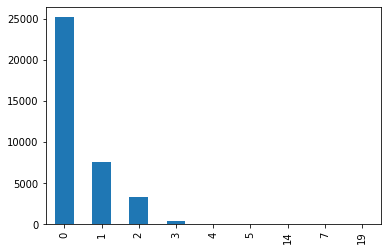

In [ ]:
data['child_num'].value_counts().plot.bar()

In [ ]:
data.loc[data['child_num'] > 2 , 'child_num'] =2

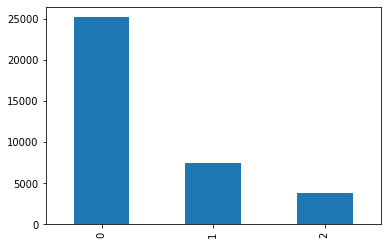

In [ ]:
data['child_num'].value_counts().plot.bar()

In [ ]:
data['child_num'].value_counts()

0    25201
1     7492
2     3764
Name: child_num, dtype: int64

In [ ]:
data[group2].apply(lambda x : len(x.unique()))

child_num       3
income_type     5
edu_type        5
family_type     5
house_type      6
family_size    10
credit          4
dtype: int64

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
data['income_type'].unique()

array(['Commercial associate', 'Working', 'State servant', 'Pensioner',
       'Student'], dtype=object)

In [ ]:
set(label_encoder.fit_transform(data['income_type'])) #label값을 인코더 해준다  - 이전까지 해준거

{0, 1, 2, 3, 4}

In [ ]:
data['income_type'] = label_encoder.fit_transform(data['income_type'])
data['edu_type'] = label_encoder.fit_transform(data['edu_type'])
data['family_type'] = label_encoder.fit_transform(data['family_type'])
data['house_type'] = label_encoder.fit_transform(data['house_type'])

In [ ]:
data[group2]

,child_num,income_type,edu_type,family_type,house_type,family_size,credit
0,0,0,1,1,2,2.0,1.0
1,1,0,4,0,1,3.0,1.0
2,0,4,1,1,1,2.0,2.0
3,0,0,4,1,1,2.0,0.0
4,0,2,1,1,1,2.0,2.0
...,...,...,...,...,...,...,...
9995,0,4,2,1,1,2.0,NaN
9996,0,4,4,0,1,2.0,NaN
9997,0,4,4,1,1,2.0,NaN
9998,0,0,4,1,1,2.0,NaN


In [ ]:
data[group3]

,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,0,202500.0,-13899,-4709,-6.0
1,1,247500.0,-11380,-1540,-5.0
2,2,450000.0,-19087,-4434,-22.0
3,3,202500.0,-15088,-2092,-37.0
4,4,157500.0,-15037,-2105,-26.0
...,...,...,...,...,...
9995,36452,202500.0,-18593,-5434,-19.0
9996,36453,202500.0,-10886,-1315,-34.0
9997,36454,292500.0,-21016,-14018,-55.0
9998,36455,180000.0,-16541,-1085,-33.0


In [ ]:
data["income_total"].min()

27000.0

In [ ]:
data["income_total"].max()

1575000.0

In [ ]:
len(data['income_total'].unique())

265

In [ ]:
import numpy as np

counts , bin_dividers = np.histogram(data["income_total"] , bins = 7)
# 도수 ,구분 = np.histogram(data , 도수분포구간(bin))

In [ ]:
data["income_total"]

0       202500.0
1       247500.0
2       450000.0
3       202500.0
4       157500.0
          ...   
9995    202500.0
9996    202500.0
9997    292500.0
9998    180000.0
9999    270000.0
Name: income_total, Length: 36457, dtype: float64

In [ ]:
data['income_total'] = pd.factorize(pd.cut(data['income_total'], bins = bin_dividers, include_lowest=True, labels = [i for i in range(7)])
)[0]#cut으로 구간 나누기

In [ ]:
#apply함수자체가 map함수와 동일일

In [ ]:
data['DAYS_BIRTH']

0      -13899
1      -11380
2      -19087
3      -15088
4      -15037
        ...  
9995   -18593
9996   -10886
9997   -21016
9998   -16541
9999    -9154
Name: DAYS_BIRTH, Length: 36457, dtype: int64

In [ ]:
def make_bin(array, n):
    array = - array
    _, bin_dividers = np.histogram(array, bins = n)
    cut_categories = pd.cut(array, bin_dividers, labels = [i for i in range(n)], include_lowest=True)
    bined_array = pd.factorize(cut_categories)[0]
    return bined_array

In [ ]:
pd.Series(make_bin(data['DAYS_BIRTH'], 10)).value_counts()

0    5177
3    5015
1    4922
5    4248
4    4063
2    3934
8    3713
6    3252
9    1252
7     881
dtype: int64

In [ ]:
data['DAYS_BIRTH'] = make_bin(data['DAYS_BIRTH'], 10)
data['DAYS_EMPLOYED'] = make_bin(data['DAYS_EMPLOYED'], 6)
data['begin_month'] = make_bin(data['begin_month'], 4)

In [ ]:
data[group3]

,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,0,0,0,0,0
1,1,0,1,0,0
2,2,1,2,0,1
3,3,0,3,0,2
4,4,0,3,0,1
...,...,...,...,...,...
9995,36452,0,2,0,1
9996,36453,0,5,0,2
9997,36454,1,8,0,3
9998,36455,0,4,0,2


In [ ]:
train.shape

(26457, 20)

In [ ]:
test.shape

(10000, 19)

In [ ]:
test = data[-10000:]
train = data[:-10000]

train_x = train.drop("credit" , axis =1)
train_y = train['credit']
test_x = test.drop("credit" , axis = 1)
train_x.shape

(26457, 18)

In [ ]:
train_y.shape

(26457,)

In [ ]:
test_x.shape

(10000, 18)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
train_proba = clf.predict_proba(train_x)

In [ ]:
train_proba[:10]#확률로 줌

array([[0.1 , 0.77, 0.13],
       [0.08, 0.69, 0.23],
       [0.09, 0.09, 0.82],
       [0.76, 0.03, 0.21],
       [0.13, 0.04, 0.83],
       [0.11, 0.69, 0.2 ],
       [0.1 , 0.08, 0.82],
       [0.66, 0.11, 0.23],
       [0.07, 0.04, 0.89],
       [0.05, 0.16, 0.79]])

In [ ]:
np.argmax(train_proba, axis = 1)[:10]

array([1, 1, 2, 0, 2, 1, 2, 0, 2, 2])

In [ ]:
sample_submission.iloc[:,1:] =  clf.predict_proba(test_x)

In [ ]:
sample_submission

,index,0,1,2
0,26457,0.07,0.25,0.68
1,26458,0.08,0.28,0.64
2,26459,0.06,0.26,0.68
3,26460,0.11,0.27,0.62
4,26461,0.06,0.36,0.58
...,...,...,...,...
9995,36452,0.10,0.38,0.52
9996,36453,0.12,0.26,0.62
9997,36454,0.08,0.11,0.81
9998,36455,0.06,0.41,0.53


In [ ]:
sample_submission.to_csv("sample_submission_ver1.csv", index = False)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y,
                 stratify = train_y, 
                 test_size = 0.25,
                 random_state = 10086
                 )
#ㄴstaryfy classfication을 다룰떄 매우중요한 옵션값 calss의 비율을 train/validation에 유지해준다 
#random state:세트를 섞을때 해당 int 값을 보고 섞으며 하이퍼 파라미터를 튜닝시 이 값을 고정해두고 튜닝해야 매번 데이터셋이 변경되는 것을 방지할 수 있습니다

In [ ]:
clf = RandomForestClassifier()

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_proba = clf.predict_proba(X_val)

In [ ]:
y_val_onehot = pd.get_dummies(y_val)

In [ ]:
y_proba

array([[0.17, 0.34, 0.49],
       [0.  , 0.24, 0.76],
       [0.24, 0.03, 0.73],
       ...,
       [0.12, 0.12, 0.76],
       [0.03, 0.25, 0.72],
       [0.01, 0.26, 0.73]])

In [ ]:
y_val_onehot

,0.0,1.0,2.0
36,0,0,1
3464,0,0,1
2640,0,0,1
22500,0,1,0
17275,0,1,0
...,...,...,...
6806,0,1,0
23096,0,0,1
7756,0,0,1
23331,0,0,1


In [ ]:
from sklearn.metrics import log_loss
log_loss(y_val_onehot, y_proba)

1.0503011290969924